In [1]:
import cv2
import os 
from tqdm import tqdm

In [2]:
import numpy as np
from random import shuffle

In [3]:
TRAIN_DIR='D://ML/DATA/dogs-vs-cats/train/train'
TEST_DIR='D://ML/DATA/dogs-vs-cats/test1/test1'

In [4]:
IMG_SIZE=50
LR=1e-3

MODEL_NAME='dogsvscats-{}-{}.model'.format(LR,'2conv-basic')

In [5]:
def label_img(img):
    label=img.split('.')[0]
    if label=='cat':
        return [1,0]
    elif label=='dog':
        return [0,1]

In [6]:
def create_train_data():
    training_data=[]
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label=label_img(img)
        path=os.path.join(TRAIN_DIR, img)
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    return training_data

In [7]:
def process_test_data():
    testing_data=[]
    for img in tqdm(os.listdir(TEST_DIR)):
        path=os.path.join(TEST_DIR,img)
        img_num=img.split('.')[0]
        img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img),img_num])
    shuffle(testing_data)
    return testing_data

In [8]:
test_data=process_test_data()

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:34<00:00, 357.39it/s]


In [9]:
train_data=create_train_data()

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:10<00:00, 353.30it/s]


In [11]:
train_data[1]

[array([[106, 110, 113, ...,  83,  87,  72],
        [113, 111, 118, ...,  77,  72,  82],
        [109, 117, 116, ...,  85,  83,  76],
        ...,
        [ 97,  89, 106, ...,  88,  75,  74],
        [101,  77,  93, ..., 118,  95,  81],
        [ 89,  85,  95, ..., 103,  95, 101]], dtype=uint8), array([1, 0])]

In [15]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

In [16]:
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')

convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet)

In [17]:
train = train_data[:-500]
test = train_data[-500:]

In [18]:
#Separating features and labels in training and testing set created from main training dataset
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]

In [19]:
X.shape

(24500, 50, 50, 1)

In [20]:
print(np.array(Y).shape)

(24500, 2)


In [21]:
test_x.shape

(500, 50, 50, 1)

In [23]:
print(np.array(test_y).shape)

(500, 2)


In [24]:
model.fit({'input': X}, {'targets': Y}, n_epoch=3, validation_set=({'input': test_x}, {'targets': test_y}),show_metric=True, run_id=MODEL_NAME)

---------------------------------
Run id: dogsvscats-0.001-2conv-basic.model
Log directory: /tmp/tflearn_logs/
INFO:tensorflow:Summary name Accuracy/Adam_0 (raw) is illegal; using Accuracy/Adam_0__raw_ instead.
INFO:tensorflow:Summary name Accuracy_1/Adam_1 (raw) is illegal; using Accuracy_1/Adam_1__raw_ instead.
---------------------------------
Training samples: 49000
Validation samples: 1000
--


InvalidArgumentError: You must feed a value for placeholder tensor 'targets_1/Y' with dtype float and shape [?,2]
	 [[node targets_1/Y (defined at C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tflearn\layers\estimator.py:101) ]]

Original stack trace for 'targets_1/Y':
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel\kernelapp.py", line 563, in start
    self.io_loop.start()
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\asyncio\base_events.py", line 534, in run_forever
    self._run_once()
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\asyncio\base_events.py", line 1771, in _run_once
    handle._run()
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-de9ad16cd0aa>", line 14, in <module>
    convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tflearn\layers\estimator.py", line 101, in regression
    placeholder = tf.placeholder(shape=p_shape, dtype=dtype, name="Y")
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\ops\array_ops.py", line 2143, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 6261, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


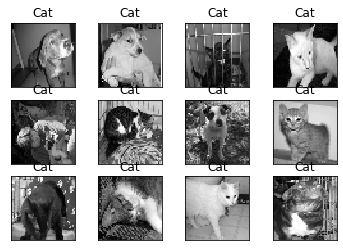

In [21]:
import matplotlib.pyplot as plt

# if you need to create the data:
#test_data = process_test_data()
# if you already have some saved:
#test_data = np.load('test_data.npy')

fig=plt.figure()

for num,data in enumerate(test_data[:12]):
    # cat: [1,0]
    # dog: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: str_label='Dog'
    else: str_label='Cat'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()